# Regression and Interpolation
Data regression is a critical skill to determine correlations and potential causations between different variables in a system.  In this lecture, we will learn how to use Python to perform regression and interpolation.

Regression is where you use the different functions you learned about in geometry and algebra to attempt to fit a curve to a set of data.  The most common type of regression is linear regression where you attempt to fit a line to a set of data. The parameters for the curve are determined by minimizing the sum of the squares of the difference between the data and the curve.  This is called the least squares method.  For a linear regression, the parameters that are determined are the slope and intercept.

Below is an example of both a linear and a non-linear regression where first the data is imported and then operated on to obtain the independent variable (day of the year).  Then the data is plotted and a curve is fit to the data. The same steps would be used for a linear regression.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.optimize import curve_fit, minimize

## First Example: Linear Regression

First generate the data and plot it

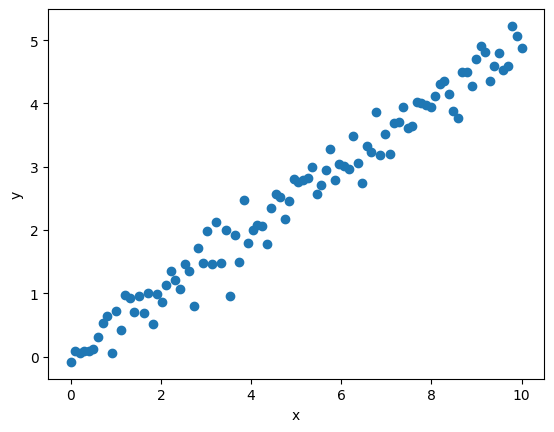

In [2]:
#first generate the data
x = np.linspace(0, 10, 100)
y = 0.5*x + np.random.randn(100)*0.25
plt.scatter(x, y); plt.xlabel('x'); plt.ylabel('y')
plt.show()

Regression involves making an approximation to relate the independent variable (what you can control) to the dependent variable (what you measure). x is typically the independent variable and y is the dependent variable.  

Once you have the data, there are multiple ways to obtain an estimate or approximation of the relationship between the variables.  Here we'll review multiple methods:
- numpy.polyfit
- scipy.optimize.curve_fit
- scipy.optimize.minimize
- (there are many other packages that you could use)

### A. Numpy Polyfit
Numpy polyfit can be used to fit a polynomial to a set of data. The polynomial can be first order which is a linear regression or higher order.  The higher the order, the more complex the curve can be.  The polyfit function returns the coefficients of the polynomial.  The coefficients can be used to plot the polynomial.

In [3]:
param = np.polyfit(x, y, 1) #linear fit yielding the slope and intercept
print(f'The slope is {param[0]:0.3f} and the intercept is {param[1]:0.3f}')

The slope is 0.498 and the intercept is 0.028


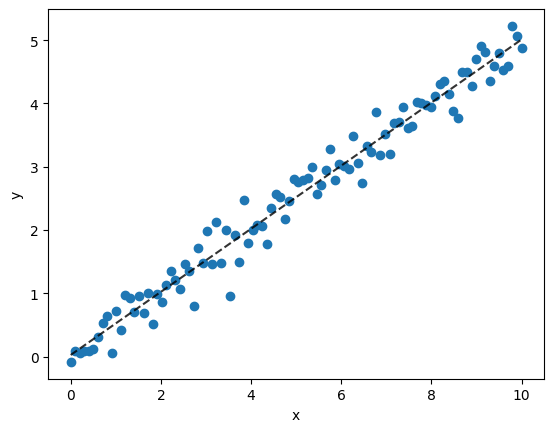

In [4]:
#now plot the fit
plt.scatter(x, y); plt.xlabel('x'); plt.ylabel('y')
plt.plot(x, param[0]*x + param[1], 'k--',alpha=0.8) #
plt.show()

Regression statistics can be calculated to the rsquared and the mape value which are measures of how well the regression line fits the data.

#### R2: R-squared
R-squared ranges from 0 to 1 with values closer to 1 indicating a better fit. It is calculated as 1 - (SSres/SStot) where SSres is the sum of the squares of the residuals and SStot is the total sum of the squares as given below.

In [5]:
#calculate the r-squared value
yhat = param[0]*x + param[1] #the predicted values
ybar = np.mean(y) #the mean of the observed values
SStot = np.sum((y-ybar)**2) #total sum of squares
SSres = np.sum((y-yhat)**2) #residual sum of squares
r2 = 1 - SSres/SStot
print(f'The r-squared value is {r2:0.3f}')

The r-squared value is 0.972


#### MAPE Value (Mean Absolute Percent Error)
I like the MAPE value better than R-squared value as it indicates the total percent error. You could have a high R-squared value but still have a large error.  The MAPE value is calculated as the sum of the absolute value of the difference between the data and the regression line divided by the sum of the data.  The MAPE value is given below.

In [6]:
#MAPE value
MAPE = np.mean(np.abs((y-yhat)/y))*100
print(f'The MAPE value is {MAPE:0.3f}%')

The MAPE value is 25.244%


Thus, using the predicted line relating x to y, the error you might expect in doing so is 23\% (the MAPE value). Using the R-squared value, it's not straightforward how you would make such a statement.

### B. Scipy Optimize Curve Fit

Curve Fit is a scipy package that uses non-linear least squares to fit data to a function. It also generates a covariance matrix as detailed in the online documentation https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html.

In [7]:
#first specify the linear model (equation for a line)
def line(x, m, b):
    return m*x + b

In [8]:
#Now call the curve_fit function
popt, pcov = curve_fit(line, x, y)
print(f'The slope is {popt[0]:0.3f} and the intercept is {popt[1]:0.3f}')
print(f'The uncertainties in the two parameters is {np.sqrt(np.diag(pcov))}')

The slope is 0.498 and the intercept is 0.028
The uncertainties in the two parameters is [0.00858676 0.04970071]


### C. Scipy Optimize Minimize (A General Method)

Minimize is beneficial as you can use it for many different things not just regression.  It is a general method that can be used to minimize a function.  In this case, we are minimizing the sum of the squares of the difference between the data and the curve.  The minimize function requires an initial guess for the parameters.  Further information is here: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize 

In [9]:
#first define a function that will calculate the error
def error(p, x, y):
    return np.sum((y - line(x, *p))**2)

In [10]:
#now use the minimize function to find the best fit parameters
p0 = [0, 0] #initial guess for the parameters
res = minimize(error, p0, args=(x, y))

In [11]:
res

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 6.143128272342569
        x: [ 4.983e-01  2.750e-02]
      nit: 2
      jac: [ 5.722e-05  8.345e-06]
 hess_inv: [[ 5.881e-04 -2.941e-03]
            [-2.941e-03  1.970e-02]]
     nfev: 114
     njev: 34

## Second Example: Fit a Relationship (Non-Linear) to Sun Rise Data vs. Day of Year

In [16]:
df = pd.read_csv('https://github.com/clint-bg/comptools/blob/main/lectures/supportfiles/sunrisedata.csv?raw=True', header=4)
# sort based on the Month and Day
df = df.sort_values(['Month', 'Day'])

The above data is from [<https://in-the-sky.org/>](<https://in-the-sky.org/>). The data is of course a function of the longitude and latitude. For this data, it was latitude 43.26; longitude -86.02.

In [17]:
df.head()

,Year,Month,Day,Age of Moon,SunRise,SunCulm,SunSet,Constellation(Sun),MoonRise,MoonCulm,MoonSet,Constellation(Moon)
200,2023,1,2,10 days,9:14,13:46,18:19,Sagittarius,15:05,22:42,5:24,Aries
201,2023,1,3,11 days,9:14,13:47,18:20,Sagittarius,15:36,23:31,6:30,Taurus
202,2023,1,4,12 days,9:14,13:47,18:21,Sagittarius,16:14,--:--,7:35,Taurus
203,2023,1,5,13 days,9:14,13:48,18:22,Sagittarius,16:59,0:22,8:35,Taurus
204,2023,1,6,14 days,9:14,13:48,18:22,Sagittarius,17:52,1:13,9:27,Gemini


Like most data sets, the data you import may not have the columns that you would like to have but you can generate the needed columns from the existing data. For example, the data we imported above reports the sunrise times for the given month and day. We'd like a column for the day of the year. We can use the `datetime` module to generate this column.

In [14]:
#generate a new column for the day of the year using the Month and Day columns and datetime
df['Date'] = pd.to_datetime(df[['Month', 'Day']].assign(year=2023))
#now from that date column, get the day of the year
df['DayOfYear'] = df['Date'].dt.dayofyear

Note that you could program the day of year using if statements based on the month and day fields. However, the `datetime` module in pandas already has these tools. 

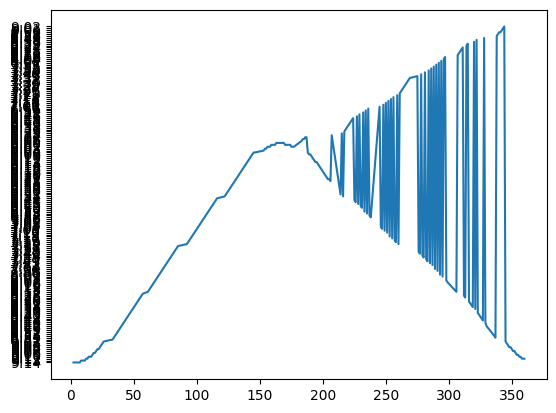

In [15]:
#Plot of the sunset time vs day of the year
plt.plot(df['DayOfYear'], df['SunRise'])
plt.show()

Note that the sunrise time is a string so when plotted, each string is sorted and then it's plotted and given a tick mark. We'll need to convert the times from a string of hr:min to a float of hours using the 'datetime' module.

In [16]:
#convert sunrise time from a string of hr:min to a float of hours
df['SunRiseHr'] = df['SunRise'].str.split(':').apply(lambda x: int(x[0]) + int(x[1])/60)

Notice the string function of split(':') which splits the string into a list of strings based on the ':' character. The first element of the list is the hour and the second element is the minute. We can then convert the hour and minute to a float of hours using the apply and lambda functions. An alternative way of doing this is below.

In [17]:
#alternate way of getting a float of hours from a string of hr:min
def getHrMin(s):
    h, m = s.split(':')
    return int(h) + int(m)/60

df['SunRiseHr'] = df['SunRise'].apply(getHrMin)

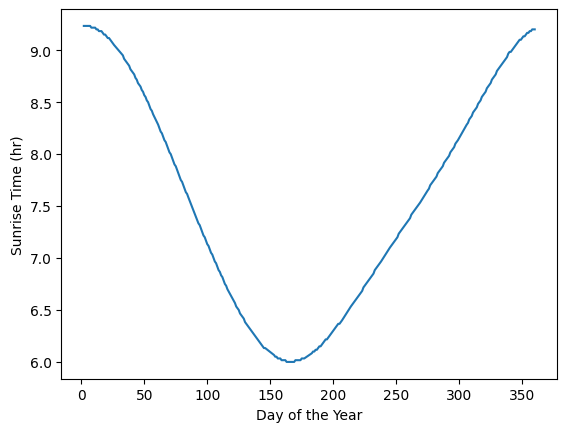

In [18]:
#now plot the sunrise time vs day of the year
plt.plot(df['DayOfYear'], df['SunRiseHr'])
plt.xlabel('Day of the Year'); plt.ylabel('Sunrise Time (hr)')
plt.show()

The above plot looks like a period of the cosine function. Let's plot a modified version of the cosine function to see if it fits the data.

In [19]:
#generate arrays for the day of the year and the sunrise time with cosine
day = np.linspace(0, 365, 366)
sunrise = 3.3/2*np.cos(2*np.pi*(day+18)/(365+18)) + 7.5

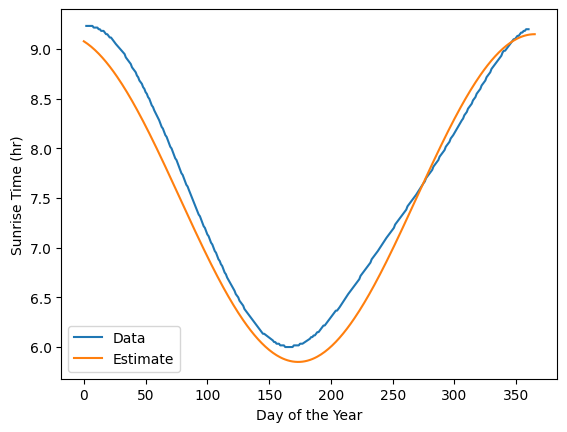

In [20]:
#now plot the estimate and the data
plt.plot(df['DayOfYear'], df['SunRiseHr'], label='Data')
plt.plot(day, sunrise, label='Estimate')
plt.xlabel('Day of the Year'); plt.ylabel('Sunrise Time (hr)')
plt.legend()
plt.show()

Our estimate based on our knowledge of the cosine function with scaling the amplitude and shifting the phase seems to fit the data well. We can use (1) the `curve_fit` function from the `scipy.optimize` module to fit the data to the cosine function and (2) minimizing the squared error with scipy minimize.

### Method 1: Using the `curve_fit` function from the `scipy.optimize` module

In [21]:
# Curve fitting with scipy

# define the function to fit
def cosFunc(x, a, b, c):
    return a/2*np.cos(2*np.pi*(x+b)/(365+b)) + c

# fit the function to the data
popt, pcov = curve_fit(cosFunc, df['DayOfYear'], df['SunRiseHr'])

The popt variable are the fitted parameters a,b,and c. The starred expression, *popt, is a way of unpacking the tuple into the variables popt[0], popt[1], popt[2], or a, b, and c in the cosFunc function.

The pcov variable is the covariance matrix and the diagonal elements are the variance of the parameters. The diagonal elements is the variance of each parameter with the square root of the variance equal to the standard deviation of the parameters. 



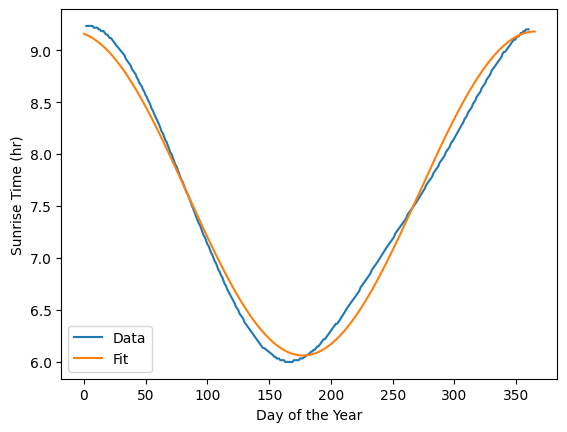

In [22]:
# plot the data and the fit
plt.plot(df['DayOfYear'], df['SunRiseHr'], label='Data')
plt.plot(day, cosFunc(day, *popt), label='Fit')
plt.xlabel('Day of the Year'); plt.ylabel('Sunrise Time (hr)')
plt.legend()
plt.show()

Let's also calculate the sum of the squared error for the fit as well as the mean absolute percent error (MAPE). The MAPE is a measure of the average percent error of the fit.

In [23]:
# first we have to generate a prediction for the sunrise time for each day of the year
df['SunRiseHrEst'] = cosFunc(df['DayOfYear'], *popt)

In [24]:
# first the sum of the squared error
def SSE(y, yhat):
    return np.sum((y - yhat)**2)

SSE = SSE(df['SunRiseHr'], df['SunRiseHrEst'])
print('SSE =', SSE)

SSE = 4.3536151772476686


In [25]:
# now the MAPE or mean absolute percentage error
def MAPE(y, yhat):
    return np.mean(np.abs((y - yhat)/y))*100

MAPE = MAPE(df['SunRiseHr'], df['SunRiseHrEst'])
print('MAPE =', MAPE)

MAPE = 1.4491283240769897


So the mean absolute percent error is 1.4% which is pretty good. Another measure of the goodness of fit is the coefficient of determination or $R^2$ value. 

In [26]:
# now the coefficient of determination, R^2
def R2(y, yhat):
    return 1 - np.sum((y - yhat)**2)/np.sum((y - np.mean(y))**2)

R2 = R2(df['SunRiseHr'], df['SunRiseHrEst'])
print('R^2 =', R2)

R^2 = 0.9877915998692728


### Method 2: Minimizing the squared error with scipy minimize
We can setup a function to calculate the sum of the squared errors and then use the scipy minimize function to minimize those errors. 

In [27]:
# first setup the SSE function
def SSE(y, yhat):
    return np.sum((y - yhat)**2)

In [28]:
#Now setup our equation as a function of an array of coefficients
def cosFunc(x, coeff):
    a, b, c = coeff
    return a/2*np.cos(2*np.pi*(x+b)/(365+b)) + c

In [29]:
# now setup the function to minimize
def minFunc(coeff, x, y):
    return SSE(y, cosFunc(x, coeff))

In [30]:
#now we can minimize the function
from scipy.optimize import minimize

# first we need to give an initial guess for the coefficients
coeff0 = [3, 18, 7.5]

# now minimize the function
res = minimize(minFunc, coeff0, args=(df['DayOfYear'], df['SunRiseHr']))

In [31]:
print(res)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 4.353615176985681
        x: [ 3.117e+00  9.964e+00  7.621e+00]
      nit: 7
      jac: [ 1.490e-06 -1.192e-07 -1.967e-06]
 hess_inv: [[ 1.410e-02  7.921e-02  5.370e-04]
            [ 7.921e-02  1.671e+01  7.408e-02]
            [ 5.370e-04  7.408e-02  1.998e-03]]
     nfev: 44
     njev: 11


Note the above minimize result (res) that is reported with the coefficients listed in the x variable (accessed with res.x) and the SSE function value of 4.35 (which agrees with the curve_fit function). There are also some jacobian and hessian information that we won't discuss here but shows that the minimize function is using a gradient (or derivative) based method to minimize the SSE function.

## Interpolation
Interpolation is getting a value at a different point than what is given in the data table. For example, below is a snapshot of a portion of the steam table. We would like an accurate estimate of the vapor pressure at 18.2 decgrees C.

<img src='https://raw.githubusercontent.com/clint-bg/comptools/main/lectures/supportfiles/steamtab.png' width='350'>

We'll use the scipy interpolator (1D) although there are many other options as described [here](https://docs.scipy.org/doc/scipy/reference/interpolate.html).

In [32]:
#First create a table or dictionary of the values around 18.2 C
table = {'TempC':[10,15,20,25], 'VPkPa':[1.2276,1.7051,2.3385,3.1691]}
#Now interpolate the value at 18.2 C
from scipy.interpolate import interp1d, BarycentricInterpolator
# Create the interpolator
finterp = interp1d(table['TempC'], table['VPkPa'])

# Evaluate the interpolator at desired location
z = finterp(18.2)
print(f'VP at 18.2 C = {z:.4f} kPa')


VP at 18.2 C = 2.1105 kPa


In [33]:
#or if you wanted to use a polynomial interpolation
# Create the interpolator
finterpP = BarycentricInterpolator(table['TempC'], table['VPkPa'])

# Evaluate the interpolator at desired location
z = finterpP(18.2)
print(f'VP at 18.2 C = {z:.4f} kPa')

VP at 18.2 C = 2.0899 kPa


In [34]:
#and we should get the same answer when evaluating both at 20C
print(f'{finterp(20)}, {finterpP(20)}, {table["VPkPa"][2]}')

2.3385, 2.3385, 2.3385
